In [1]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


In [2]:
# Make a measure function

def generate_multiD_data(expt):
    """
    Generates fake data proportinal to scanX.i
    x1 - 0D data (point)
    x2 - 1D data (line/array)
    x3 - 2D data (2D array)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.scan0.i + runinfo.scan1.i*runinfo.scan0.n + \
           runinfo.scan2.i*runinfo.scan0.n*runinfo.scan1.n + \
           runinfo.scan3.i*runinfo.scan0.n*runinfo.scan1.n*runinfo.scan2.n
    
    d.x1 = v
    d.x2 = [v for i in range(5)]
    d.x3 = [[v for i in range(5)] for j in range(5)]
        
    return d

In [3]:
# Setup as usual
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()


In [4]:
# 1D data
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Experiment(runinfo, devices, time=True)
expt.run()

sleep(1)

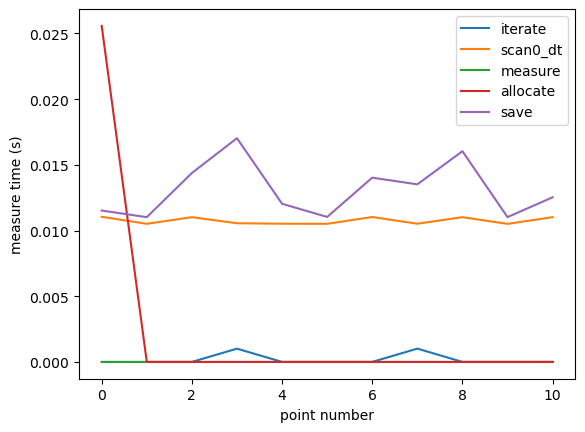

In [5]:
# Time data acquisition

plt.plot(expt.runinfo.dt1)
plt.plot(expt.runinfo.dt2)
plt.plot(expt.runinfo.dt3)
plt.plot(expt.runinfo.dt4)
plt.plot(expt.runinfo.dt5)

plt.legend(['iterate', 'scan0_dt', 'measure', 'allocate', 'save'])


plt.xlabel('point number')
plt.ylabel('measure time (s)')
plt.show()


In [6]:
print('{} s avg. property iteration time'.format(np.mean(expt.runinfo.dt1)))
print('{} s avg. scan0 wait time'.format(np.mean(expt.runinfo.dt2)))
print('{} s avg. measure time'.format(np.mean(expt.runinfo.dt3)))
print('{} s avg. data allocation time'.format(np.mean(expt.runinfo.dt4)))
print('{} s avg. data save time'.format(np.mean(expt.runinfo.dt5)))

0.0001838207244873047 s avg. property iteration time
0.010749730196866121 s avg. scan0 wait time
0.0 s avg. measure time
0.002324819564819336 s avg. data allocation time
0.013103723526000977 s avg. data save time


In [7]:
# 2D data
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.Experiment(runinfo, devices, time=True)
expt.run()


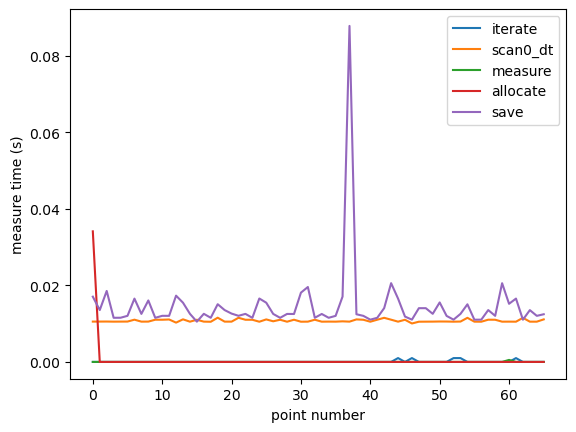

In [8]:
# Time data acquisition

plt.plot(expt.runinfo.dt1.flatten())
plt.plot(expt.runinfo.dt2.flatten())
plt.plot(expt.runinfo.dt3.flatten())
plt.plot(expt.runinfo.dt4.flatten())
plt.plot(expt.runinfo.dt5.flatten())

plt.legend(['iterate', 'scan0_dt', 'measure', 'allocate', 'save'])

plt.xlabel('point number')
plt.ylabel('measure time (s)')

plt.show()



In [9]:
print('{} s avg. property iteration time'.format(np.mean(expt.runinfo.dt1)))
print('{} s avg. scan0 wait time'.format(np.mean(expt.runinfo.dt2)))
print('{} s avg. measure time'.format(np.mean(expt.runinfo.dt3)))
print('{} s avg. data allocation time'.format(np.mean(expt.runinfo.dt4)))
print('{} s avg. data save time'.format(np.mean(expt.runinfo.dt5)))

7.595437945741595e-05 s avg. property iteration time
0.0107490366155451 s avg. scan0 wait time
7.925611553770123e-06 s avg. measure time
0.0005169095415057558 s avg. data allocation time
0.014706943974350437 s avg. data save time
